In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cross_entropy(y_true, y_hat):
    return -1.0 * ((y_true * np.log(y_hat)) + ((1.0 - y_true) * np.log(1.0 - y_hat)))

In [3]:
prior = 0.3
dataset_size = np.arange(10, 50000, 100)
monte_carlo = 1000

r_m_ce = []
r_p = []

for ds_size in dataset_size:
    y_true = np.random.binomial(1, prior, (monte_carlo, ds_size))
    r_p.append(y_true.mean())
    mean_cross_entropy = cross_entropy(y_true, prior).mean(axis=1)
    r_m_ce.append(mean_cross_entropy.mean())

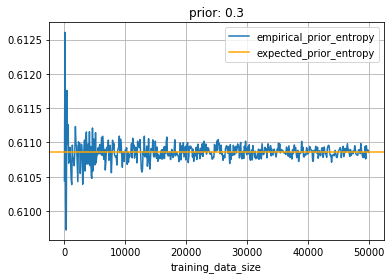

In [4]:
plt.plot(dataset_size, r_m_ce, label='empirical_prior_entropy');
plt.axhline(cross_entropy(prior, prior), label='expected_prior_entropy', color='orange');
plt.xlabel('training_data_size');
plt.title('prior: {}'.format(prior));
plt.legend();
plt.grid();
plt.savefig('images/prior_log_loss_sim.png', bbox_inches='tight');

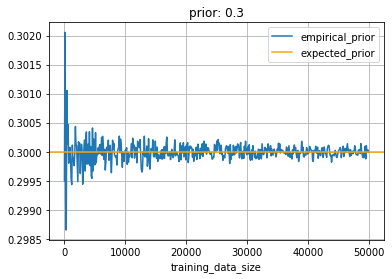

In [5]:
plt.plot(dataset_size, r_p, label='empirical_prior');
plt.axhline(prior, label='expected_prior', color='orange');
plt.xlabel('training_data_size');
plt.title('prior: {}'.format(prior));
plt.legend();
plt.grid();
plt.savefig('images/prior_sim.png', bbox_inches='tight');